In [1]:
%matplotlib notebook

In [2]:
import numpy as np
import matplotlib.pyplot as plt

<IPython.core.display.Javascript object>


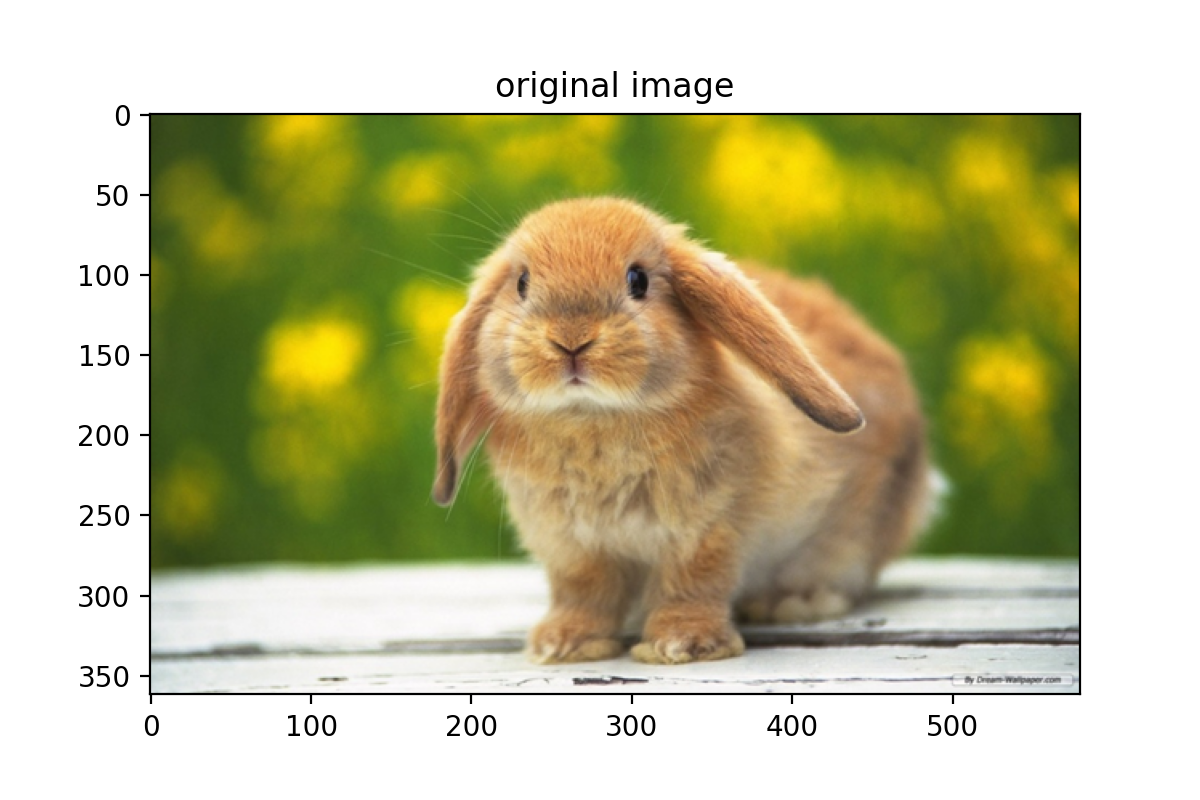

(362, 580, 3)
(362, 580, 3)
3


In [3]:
im = plt.imread('images/bunny.bmp')
plt.figure(1,figsize = (6, 4))
plt.imshow(im)
plt.title("original image")
plt.show()
print(im.shape)

print(im.shape)
print(len(im.shape))

In [12]:
# computing tlinks


# as an anlogue of object seeds, I use some subset of colors from inside bunny
R1 = im[150:250,250:400,0].flatten()
G1 = im[150:250,250:400,1].flatten()
B1 = im[150:250,250:400,2].flatten()

# as an anlogue of background seeds, I use subset of colors from the background
R0 = im[50:350,20:150,0].flatten()
G0 = im[50:350,20:150,1].flatten()
B0 = im[50:350,20:150,2].flatten()

# set of colors for all image pixels
R = im[:,:,0].flatten()
G = im[:,:,1].flatten()
B = im[:,:,2].flatten()

data1 = np.vstack([R1,G1,B1])
data0 = np.vstack([R0,G0,B0])
data  = np.vstack([R,G,B])

In [14]:
data1.shape

(3, 15000)

In [5]:
%%time

# estimate color distributions using GMM - should be fast (1-2 seconds for both models)
from sklearn import mixture

gmm1 = mixture.GaussianMixture(n_components=7, covariance_type='full')
gmm1.fit(data1.T)
gmm0 = mixture.GaussianMixture(n_components=7, covariance_type='full')
gmm0.fit(data0.T)
like1 = -gmm1.score_samples(data.T)
like0 = -gmm0.score_samples(data.T)

CPU times: user 12.6 s, sys: 9.29 s, total: 21.9 s
Wall time: 3.18 s


<IPython.core.display.Javascript object>


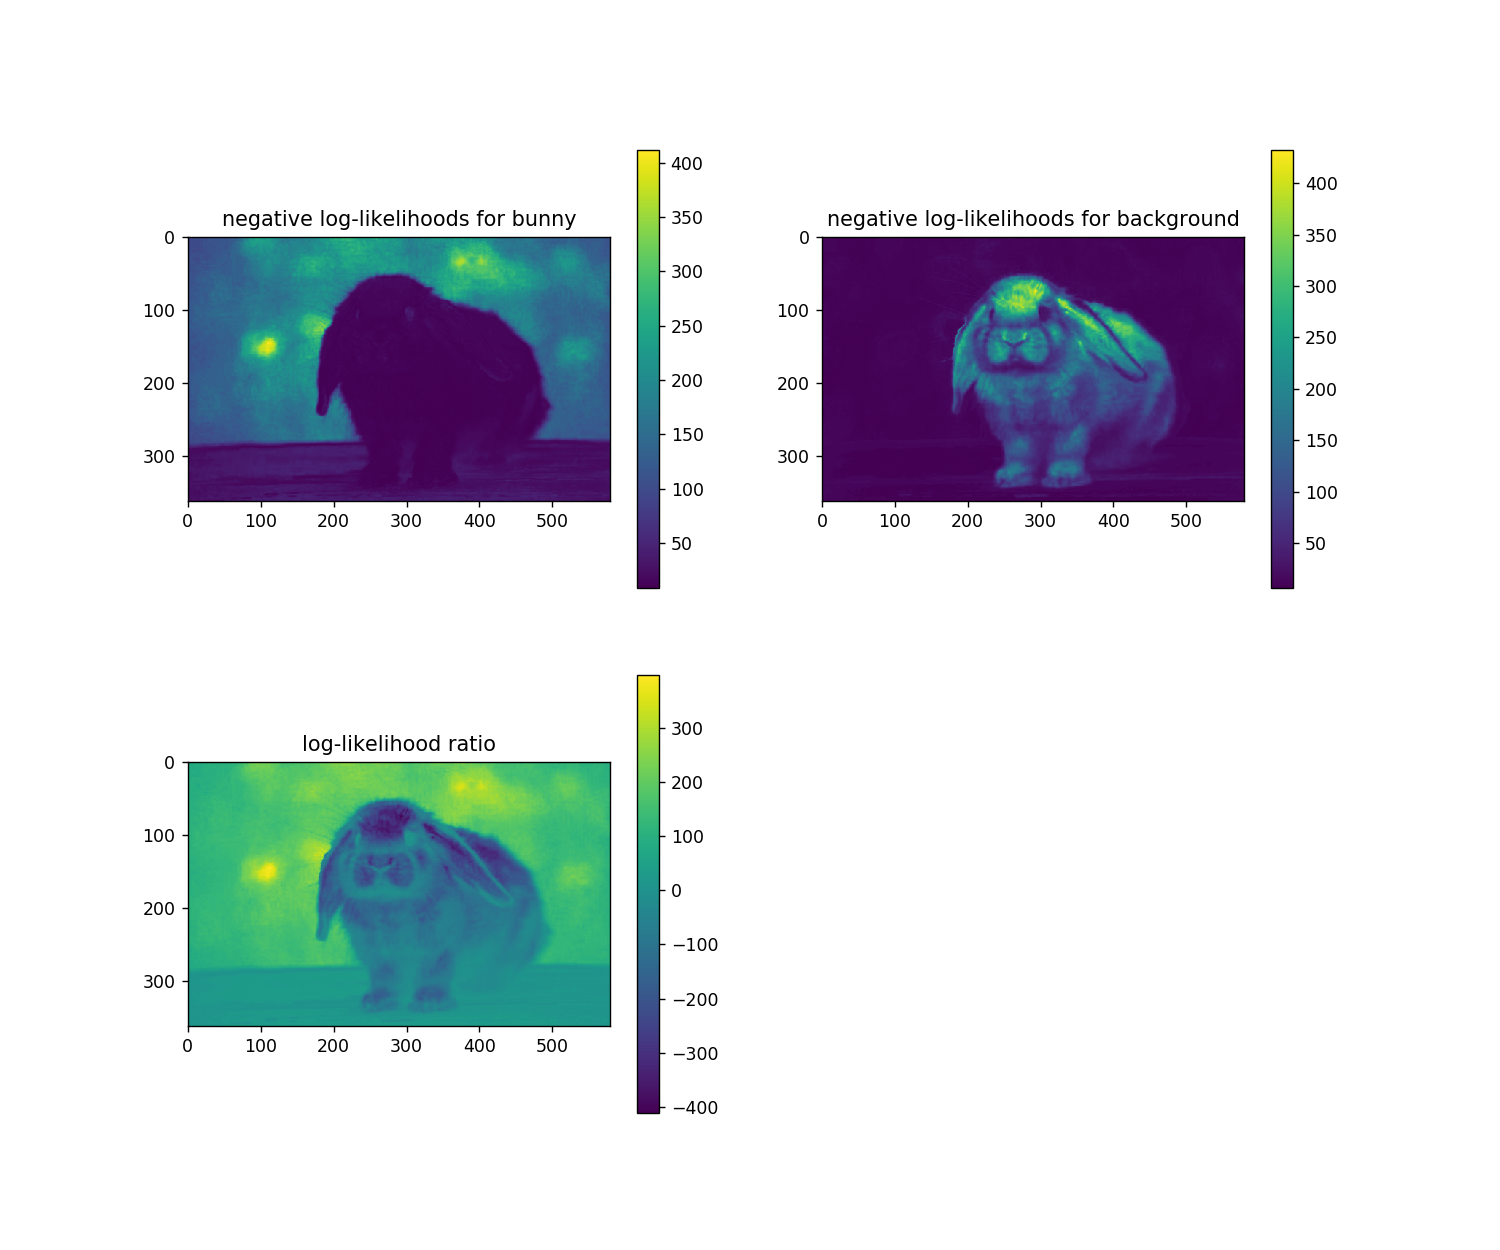

In [6]:
like1_im = like1.reshape((im.shape[0],im.shape[1]))
like0_im = like0.reshape((im.shape[0],im.shape[1]))
                   

fig = plt.figure(figsize = (12, 10))
plt.subplot(221)
plt.title("negative log-likelihoods for bunny")
plt.imshow(like1_im)
plt.colorbar()
plt.subplot(222) 
plt.title("negative log-likelihoods for background")
plt.imshow(like0_im)
plt.colorbar()
plt.subplot(223) 
plt.title("log-likelihood ratio")
plt.imshow(like1_im - like0_im)
plt.colorbar()
